# 鸢尾花数据集分析

## 1.鸢尾花数据集加载

如果没有sklearn环境，需要先安装，在bash中：pip install scikit-learn matplotlib seaborn

In [29]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 鸢尾花数据集封装在sklearn中，不需要单独下载，从sklear中导入即可

iris_dataset = load_iris()

# 查看鸢尾花数据集的键
print(iris_dataset.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


由上结果可知，该数据集的表头有 `['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']`。  
其中：

- `DESCR` 是数据集的简要说明
- `target_names` 是花的品种
- `feature_names` 是特征说明

数据存储在 `data` 和 `target` 中，也是本次实验主要采用的字段。


## 2.鸢尾花数据集的data和target字段

**查看data字段数据**

In [30]:
# 将数据集转换为 pandas DataFrame
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])

# 输出前五行
print(df.head())

# 查看数据量，共有150朵花
print("shape of data: {}".format(iris_dataset['data'].shape))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
shape of data: (150, 4)


每一列对应的是鸢尾花的四个特征：花萼长度、花萼宽度、花瓣长度和花瓣宽度。

**查看target字段**

In [31]:
print("target:\n{}".format(iris_dataset['target']))

target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


在鸢尾花数据集中，`target` 字段的值为 0、1 或 2，表示数据集中的三个类别：

- `0` 代表 **Setosa**
- `1` 代表 **Versicolor**
- `2` 代表 **Virginica**

这些数字标签对应着鸢尾花的三个不同品种，每个样本的 `target` 值表示该样本所属的类别。


## 3.一元线性回归

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
均方误差 (MSE): 0.045604284097661846
平均绝对误差 (MAE): 0.16818126256563326
决定系数 (R²): 0.9282562958836972


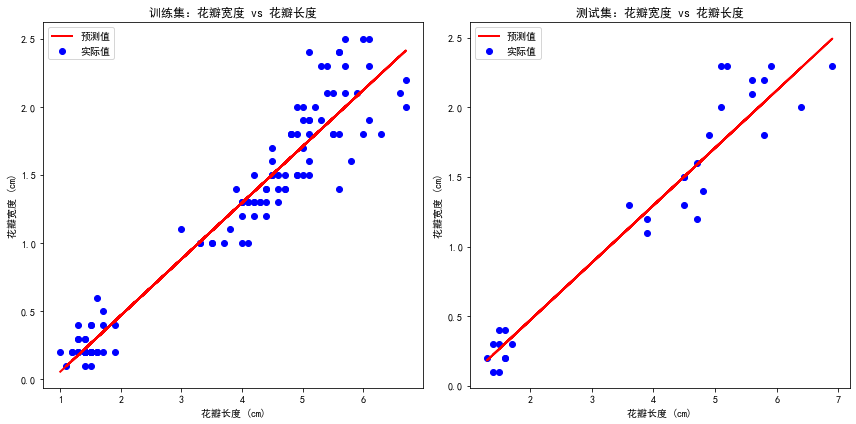

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 设置中文字体为 SimHei（黑体）
rcParams['font.sans-serif'] = ['SimHei']
# 解决负号 '-' 显示问题
rcParams['axes.unicode_minus'] = False

# 加载鸢尾花数据集
iris_dataset = load_iris()

# 转换为DataFrame
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])

# 打印数据集的前几行
print(df.head())

# 选择一个特征进行一元回归分析
X = df[['petal length (cm)']]  # 特征：花瓣长度
y = df['petal width (cm)']     # 目标变量：花瓣宽度

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred_train = model.predict(X_train)  # 预测训练集
y_pred_test = model.predict(X_test)    # 预测测试集

# 评估模型
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# 输出评估结果
print(f"均方误差 (MSE): {mse}")
print(f"平均绝对误差 (MAE): {mae}")
print(f"决定系数 (R²): {r2}")

# 绘制训练集的实际值与预测值的回归图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 第一张子图
plt.scatter(X_train, y_train, color='blue', label='实际值')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='预测值')
plt.title('训练集：花瓣宽度 vs 花瓣长度')
plt.xlabel('花瓣长度 (cm)')
plt.ylabel('花瓣宽度 (cm)')
plt.legend()

# 绘制测试集的实际值与预测值的回归图
plt.subplot(1, 2, 2)  # 第二张子图
plt.scatter(X_test, y_test, color='blue', label='实际值')
plt.plot(X_test, y_pred_test, color='red', linewidth=2, label='预测值')
plt.title('测试集：花瓣宽度 vs 花瓣长度')
plt.xlabel('花瓣长度 (cm)')
plt.ylabel('花瓣宽度 (cm)')
plt.legend()

# 显示图像
plt.tight_layout()
plt.show()


## 4.多元回归分析

### 1. 准备数据
首先，选择多个特征来训练模型。使用鸢尾花数据集中的四个特征：
- **花萼长度（sepal length）**
- **花瓣长度（petal length）**
- **花萼宽度（sepal width）**
- **花瓣宽度（petal width）**

### 2. 拆分数据集
将数据集按8:1为训练集和测试集

### 3. 训练模型
使用多元回归模型来进行训练。该模型会基于输入的四个特征来预测花的所属类别。通过最小化误差，模型会学习如何从特征中提取有用的信息，从而进行预测。

### 4. 预测与评估
模型完成训练，使用测试集进行预测。通过以下几个评估指标来评估模型的性能：
- **均方误差 (MSE)**：衡量预测值与真实值之间的平均平方差异。
- **平均绝对误差 (MAE)**：衡量预测值与真实值之间的平均绝对差异。
- **决定系数 (R²)**：衡量模型拟合优度的指标，值越接近 1 表示模型表现越好。

### 5. 可视化
最后，绘制回归图来展示模型的表现。分别绘制训练集和测试集的实际值与预测值的散点图。理想情况下，实际值与预测值应该接近对角线。


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
均方误差 (MSE): 1.2358820848462518e-30
平均绝对误差 (MAE): 1.0658141036401502e-15
决定系数 (R²): 1.0


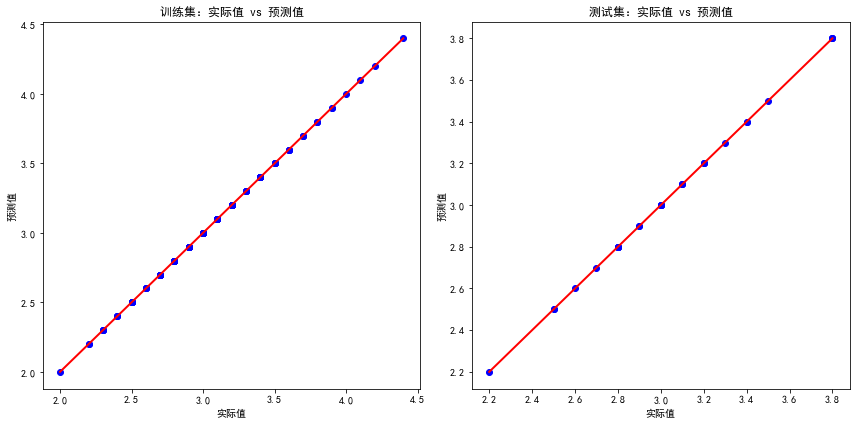

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 设置中文字体为 SimHei（黑体）
rcParams['font.sans-serif'] = ['SimHei']
# 解决负号 '-' 显示问题
rcParams['axes.unicode_minus'] = False

# 加载鸢尾花数据集
iris_dataset = load_iris()

# 转换为DataFrame
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])

# 打印数据集的前几行
print(df.head())

# 选择多个特征进行多元回归分析
X = df[['sepal length (cm)', 'petal length (cm)', 'sepal width (cm)', 'petal width (cm)']]  # 特征
y = df['sepal width (cm)']  # 目标变量：花萼宽度

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred_train = model.predict(X_train)  # 预测训练集
y_pred_test = model.predict(X_test)    # 预测测试集

# 评估模型
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# 输出评估结果
print(f"均方误差 (MSE): {mse}")
print(f"平均绝对误差 (MAE): {mae}")
print(f"决定系数 (R²): {r2}")

# 绘制训练集的实际值与预测值的回归图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 第一张子图
plt.scatter(y_train, y_pred_train, color='blue')
plt.title('训练集：实际值 vs 预测值')
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)  # 画一条对角线

# 绘制测试集的实际值与预测值的回归图
plt.subplot(1, 2, 2)  # 第二张子图
plt.scatter(y_test, y_pred_test, color='blue')
plt.title('测试集：实际值 vs 预测值')
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # 画一条对角线

# 显示图像
plt.tight_layout()
plt.show()
